# Credit card Fraud Detection System

- 약 28만건의 신용카드 거래 데이터 중에서 이상거래(Fraud)를 감지해내는 프로그램

# Module Import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Data Load

In [3]:
df = pd.read_csv("./data/creditcard.csv")  # float32 앞에 np 꼭 넣어야 함

In [4]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
type(df.head)

method

# Missing Value Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# Correlation Visualize

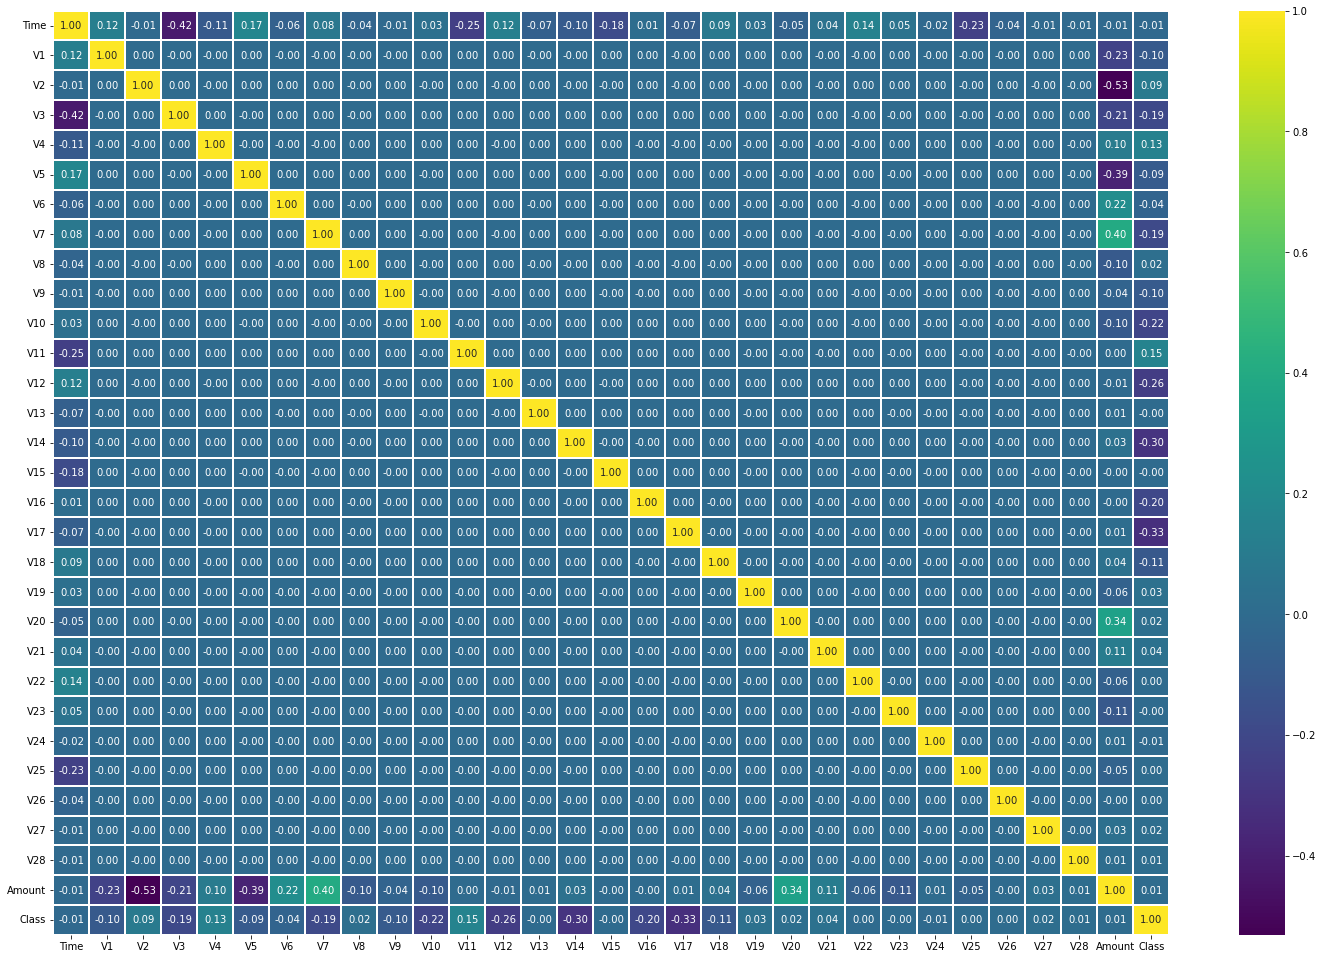

In [9]:
import seaborn
f, ax = plt.subplots(figsize = (25,17))
seaborn.heatmap(df.corr(), annot=True, linewidths=0.3, fmt="0.2f" , ax=ax, cmap="viridis")
plt.show()

#sns.heatmap(df, annot=True, fmt ='0.2f',cmap ="RdYlGn_r") # annot= True 는 각 셀에 숫자입력 # fmd ='d'는 정수 형태로 숫자입력
#plt.title("Correlation Visualize", fontsize= 20)

# EDA (Exploratory Data Analysis)
- 데이터의 전체 구조 살펴보기

In [10]:
# 0 = 정상거래, 1.0 = 이상거래 (0.0017%)
print(df["Class"].value_counts())
count_classes = pd.value_counts(df["Class"], sort=True)
count_classes.head()
print()

print(df["Class"].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64

0    0.998273
1    0.001727
Name: Class, dtype: float64


Text(0.5, 1.0, 'Transaction Class Distribution')

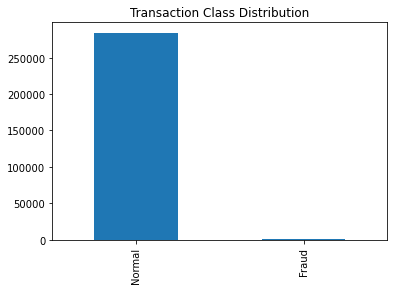

In [11]:
# Precision, Recall, F1 Score 사용 - imbalance dataset이기 때문에
labels = ["Normal","Fraud"]
count_classes.plot(kind="bar")
plt.xticks(range(2),labels) # range(2)?
plt.title("Transaction Class Distribution")

## Time, Amount columns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 172792.0)

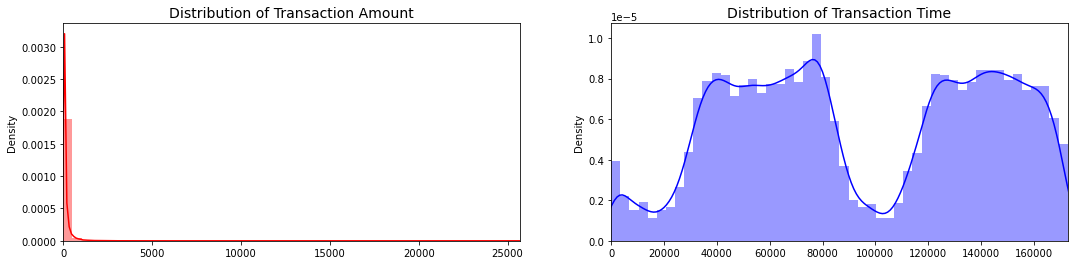

In [12]:
# EDA: Time, Amount features Distribution 
fig, ax = plt.subplots(1, 2, figsize = (18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# Distribution of Transaciton Amount 
## not Gaussian Distribution shape 
sns.distplot(amount_val, ax = ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Distribution of Transaction Time 
## not Gaussian Distribution shape 
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [13]:
# Data imbalance 확인
df.drop(columns = "Time", inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
x_data = df.iloc[:,0:-1].values # 마지막 행을 제외한 이유가 class라서 그런가..?
y_data = df.iloc[:,[-1]].values

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(284807, 29) (284807, 1)


# Data Preprocessing - Normalize

In [15]:
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)
print(x_data)

[[9.3519241e-01 7.6649040e-01 8.8136494e-01 ... 4.1897613e-01
  3.1269664e-01 5.8237929e-03]
 [9.7854203e-01 7.7006662e-01 8.4029853e-01 ... 4.1634512e-01
  3.1342265e-01 1.0470528e-04]
 [9.3521708e-01 7.5311762e-01 8.6814088e-01 ... 4.1548926e-01
  3.1191131e-01 1.4738923e-02]
 ...
 [9.9090487e-01 7.6407969e-01 7.8110206e-01 ... 4.1659316e-01
  3.1258485e-01 2.6421540e-03]
 [9.5420909e-01 7.7285570e-01 8.4958714e-01 ... 4.1851953e-01
  3.1524515e-01 3.8923896e-04]
 [9.4923186e-01 7.6525640e-01 8.4960151e-01 ... 4.1646636e-01
  3.1340083e-01 8.4464857e-03]]


# Logistic Regression

## Parameter Initialization

In [16]:
tf.random.set_seed(2022)

W = tf.Variable(tf.random.normal([29,1], mean =0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

## Hypothesis Define

In [17]:
def hypothesis(x):
    z = tf.matmul(x,W)+ b
    sigmoid = 1/ (1 + tf.exp(-z))
    return sigmoid

## Cost Function Define

In [18]:
def cost_function(H, Y):
    cost = -tf.reduce_mean( Y*tf.math.log(H) + (1-Y)*tf.math.log(1-H))
    return cost

## Metric Define

In [19]:
# 실제 퍼포먼스를 측정하는 기준 설정 - Accuracy
def accuracy(hypo, label):
    predicted = tf.cast(hypo > 0.5, dtype = tf.float32)
    accuracyd = tf.reduce_mean(tf.cast(tf.equal(predicted, label), dtype=tf.float32))
    return accuracyd

## Hyper - parmaeter Setting

In [20]:
# Hyper-parameter = 학습 진행 위해 지정해 주어야 하는 변수
learning_rate = 0.001
optimizer = tf.optimizers.SGD(learning_rate)

## Training

In [21]:
for step in range(2022):
  with tf.GradientTape() as g:
    pred = hypothesis(x_data)
    cost = cost_function(pred, y_data)
    
    gradients = g.gradient(cost, [W,b])
  
  optimizer.apply_gradients(zip(gradients, [W,b]))

  if step % 200 == 0:
    print(f"step: {step}, loss: {cost.numpy()}")

w_hat = W.numpy()
b_hat = b.numpy()

step: 0, loss: 0.026920180767774582
step: 200, loss: 0.02620912343263626
step: 400, loss: 0.025552289560437202
step: 600, loss: 0.024943819269537926
step: 800, loss: 0.024378705769777298
step: 1000, loss: 0.023852720856666565
step: 1200, loss: 0.023361973464488983
step: 1400, loss: 0.022903133183717728
step: 1600, loss: 0.022473379969596863
step: 1800, loss: 0.022070005536079407
step: 2000, loss: 0.021690817549824715


## Performance

In [22]:
# 상당히 높은 Accuracy이지만, 
# dataset-> imbalance. 그러므로 Accuracy는 모델 평가에 적절한 metric X

acc = accuracy(hypothesis(x_data), y_data).numpy()
print(f"Accuracy: {acc}")

Accuracy: 0.9982725381851196


## Precision, Recall, F1 Score
- Precision, Recall, F1 Score 측면에서 모델 재평가

In [23]:
# metric
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [24]:
predicted_x= tf.cast( hypothesis(x_data)>0.5, dtype = tf.float32)

In [25]:
print("Accuracy= ", accuracy_score(predicted_x, y_data))
print("Report = \n", classification_report(predicted_x, y_data))

Accuracy=  0.9982725143693799
Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284807
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Networks1_RandomSearch
- 인공신경망 모델로 Fraud Detecting
- Random Search: 임의의 하이퍼파라미터를 선정하는 과정을 통해 최적의 해를 찾아가는 기법

## Module Import

In [26]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [27]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

C:\Users\USER\AppData\Local\Temp/ipykernel_8112/4107618055.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

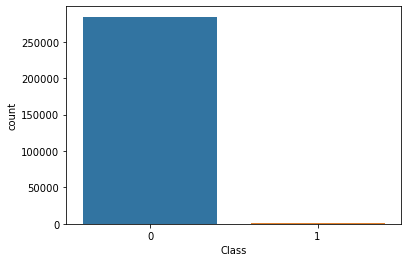

In [29]:
# Class 컬럼의 개수를 plot으로 
sns.countplot(df['Class'])

In [30]:
df = pd.read_csv("./data/creditcard.csv")  # float32 앞에 np 꼭 넣어야 함

In [31]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df.shape 

(284807, 31)

In [33]:
df.Class.unique()   

array([0, 1], dtype=int64)

In [34]:
# unique value 값 총 개수 확인 - imbalanced
df.Class.value_counts()  

0    284315
1       492
Name: Class, dtype: int64

## Create a new data

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

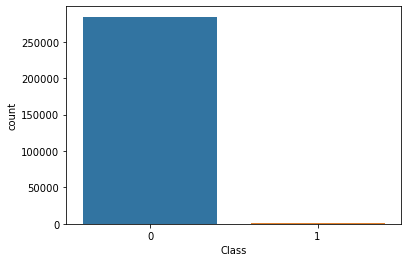

In [35]:
# Class 컬럼의 개수를 plot으로 
sns.countplot(df['Class'])

In [36]:
# binary로 분류
nf = df[df.Class==0]
f = df[df.Class==1]

In [37]:
#Total entries are 1.5* NO. of class-1 entries
nf = nf.sample(738)

In [38]:
#creating new Dataframe
data = f.append(nf,ignore_index=True)

In [39]:
data.shape

(1230, 31)

In [40]:
X = data.drop(['Class'],axis=1)
y=data['Class']

## Preprocessing - Data Split

In [41]:
# Stratified sampling은 훈련데이터를 나눌 때 무작위로 샘플링을 하되, 
# original dataset의 클래스 비율이 train, test set에서도 동일하게 유지되는 것을 보장

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [42]:
X_train.shape,X_test.shape

((984, 30), (246, 30))

## Data processing

In [43]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
X_train.shape[1]

30

## Search the best Parameter for the model

In [45]:
def build_model(hp):
    model = Sequential()
    i = 0
    for i in range(hp.Int('num_layers', 2,5)):
        if i==0:
            model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 150, 32),kernel_initializer='he_uniform',input_dim=X_train.shape[1],
                               activation='relu'))
            i += 1
        else:
            model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 150, 32),kernel_initializer='he_uniform',
                               activation='relu'))
        
        
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [0.001, 0.0001,0.01])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [46]:
tuner = RandomSearch(
            build_model,
            objective='accuracy',
            max_trials=5,
            executions_per_trial=3,
            directory='project1',
            project_name='Credit card fraud'
)
tuner.search_space_summary()

INFO:tensorflow:Reloading Tuner from project1\Credit card fraud\tuner0.json
Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 0.01], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': 'linear'}


In [47]:
tuner.search(X_train,y_train,epochs=10)

INFO:tensorflow:Oracle triggered exit


In [48]:
tuner.results_summary()

Results summary
Results in project1\Credit card fraud
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 128
units_1: 32
learning_rate: 0.01
units_2: 32
units_3: 32
Score: 0.9698509573936462
Trial summary
Hyperparameters:
num_layers: 4
units_0: 96
units_1: 96
learning_rate: 0.01
units_2: 32
units_3: 64
Score: 0.9691734512646993
Trial summary
Hyperparameters:
num_layers: 4
units_0: 64
units_1: 64
learning_rate: 0.01
units_2: 32
units_3: 96
Score: 0.9688346783320109
Trial summary
Hyperparameters:
num_layers: 3
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 32
Score: 0.9539295236269633
Trial summary
Hyperparameters:
num_layers: 2
units_0: 32
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
Score: 0.9444444378217062


## Using the best parameter

In [49]:
model = Sequential()
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',input_dim=X_train.shape[1],activation='relu'))
model.add(layers.Dense(units=96,kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 1s 9ms/step - loss: 0.5953 - accuracy: 0.7480 - val_loss: 0.4488 - val_accuracy: 0.8618
Epoch 2/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8801 - val_loss: 0.3488 - val_accuracy: 0.8902
Epoch 3/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3061 - accuracy: 0.9075 - val_loss: 0.3055 - val_accuracy: 0.8902
Epoch 4/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.9217 - val_loss: 0.2794 - val_accuracy: 0.9146
Epoch 5/20
31/31 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9278 - val_loss: 0.2687 - val_accuracy: 0.9187
Epoch 6/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.9339 - val_loss: 0.2629 - val_accuracy: 0.9268
Epoch 7/20
31/31 [==============================] - 0s 1ms/step - loss: 0.1850 - accuracy: 0.9400 - val_loss: 0.2647 - val_accuracy: 0.9350
Epoch 8/20
31/31 [==

In [51]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

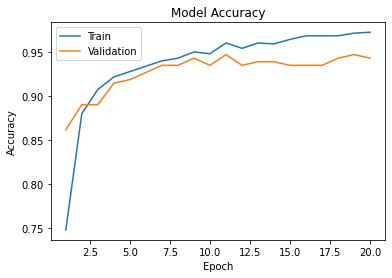

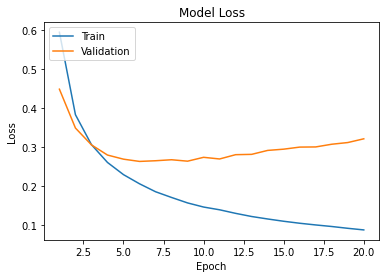

In [52]:
plotLearningCurve(history,20)

## Prediction

In [53]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 571us/step


In [54]:
y_pred = y_pred>0.5

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[143,   5],
       [  9,  89]], dtype=int64)

In [56]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("정밀도:", precision)

recall = metrics.recall_score(y_test, y_pred)
print("재현율:", recall)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

정확도: 0.943089430894309
정밀도: 0.9468085106382979
재현율: 0.9081632653061225
f1 점수: 0.9270833333333334


In [57]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred,y_test)
score

0.943089430894309

# Neural Networks2_ANN

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from keras import optimizers, metrics, callbacks

## Dataset Split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2,  random_state=22)

In [60]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=22)

In [61]:
print(x_train.shape, y_train.shape)
print(x_validate.shape, y_validate.shape)
print(x_test.shape, y_test.shape)

(182276, 29) (182276, 1)
(45569, 29) (45569, 1)
(56962, 29) (56962, 1)


## Neural Network Design

In [62]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[-1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               7680      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

## Model compile

In [64]:
model.compile(optimizer=optimizers.Adam(1e-4),
              loss = "binary_crossentropy",
              metrics =  [metrics.Recall(name="recall"),
                          metrics.Precision(name="precision")])

In [65]:
callbacks = [callbacks.ModelCheckpoint('epcoh.h5')]

# Training

batch size: 65536\
epochs: 10000\
EarlyStopping: Yes

In [68]:
history = model.fit(x_train, y_train,
                    validation_data = (x_validate, y_validate),
                    batch_size = 65536,
                    epochs = 1000,
                    callbacks = callbacks
                    )

Epoch 1/1000
3/3 [==============================] - 2s 731ms/step - loss: 0.9118 - recall: 0.4088 - precision: 0.0015 - val_loss: 0.7548 - val_recall: 1.0000 - val_precision: 0.0018
Epoch 2/1000
3/3 [==============================] - 2s 710ms/step - loss: 0.9090 - recall: 0.3805 - precision: 0.0014 - val_loss: 0.7530 - val_recall: 1.0000 - val_precision: 0.0018
Epoch 3/1000
3/3 [==============================] - 2s 731ms/step - loss: 0.9068 - recall: 0.3585 - precision: 0.0013 - val_loss: 0.7512 - val_recall: 1.0000 - val_precision: 0.0018
Epoch 4/1000
3/3 [==============================] - 2s 732ms/step - loss: 0.9020 - recall: 0.3679 - precision: 0.0013 - val_loss: 0.7495 - val_recall: 1.0000 - val_precision: 0.0018
Epoch 5/1000
3/3 [==============================] - 2s 731ms/step - loss: 0.8999 - recall: 0.3522 - precision: 0.0013 - val_loss: 0.7478 - val_recall: 1.0000 - val_precision: 0.0018
Epoch 6/1000
3/3 [==============================] - 2s 719ms/step - loss: 0.8975 - recall:

In [69]:
score = model.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 1s 725us/step - loss: 0.1412 - recall: 0.8065 - precision: 0.8152
[0.14123566448688507, 0.8064516186714172, 0.8152173757553101]


# Training Visualization

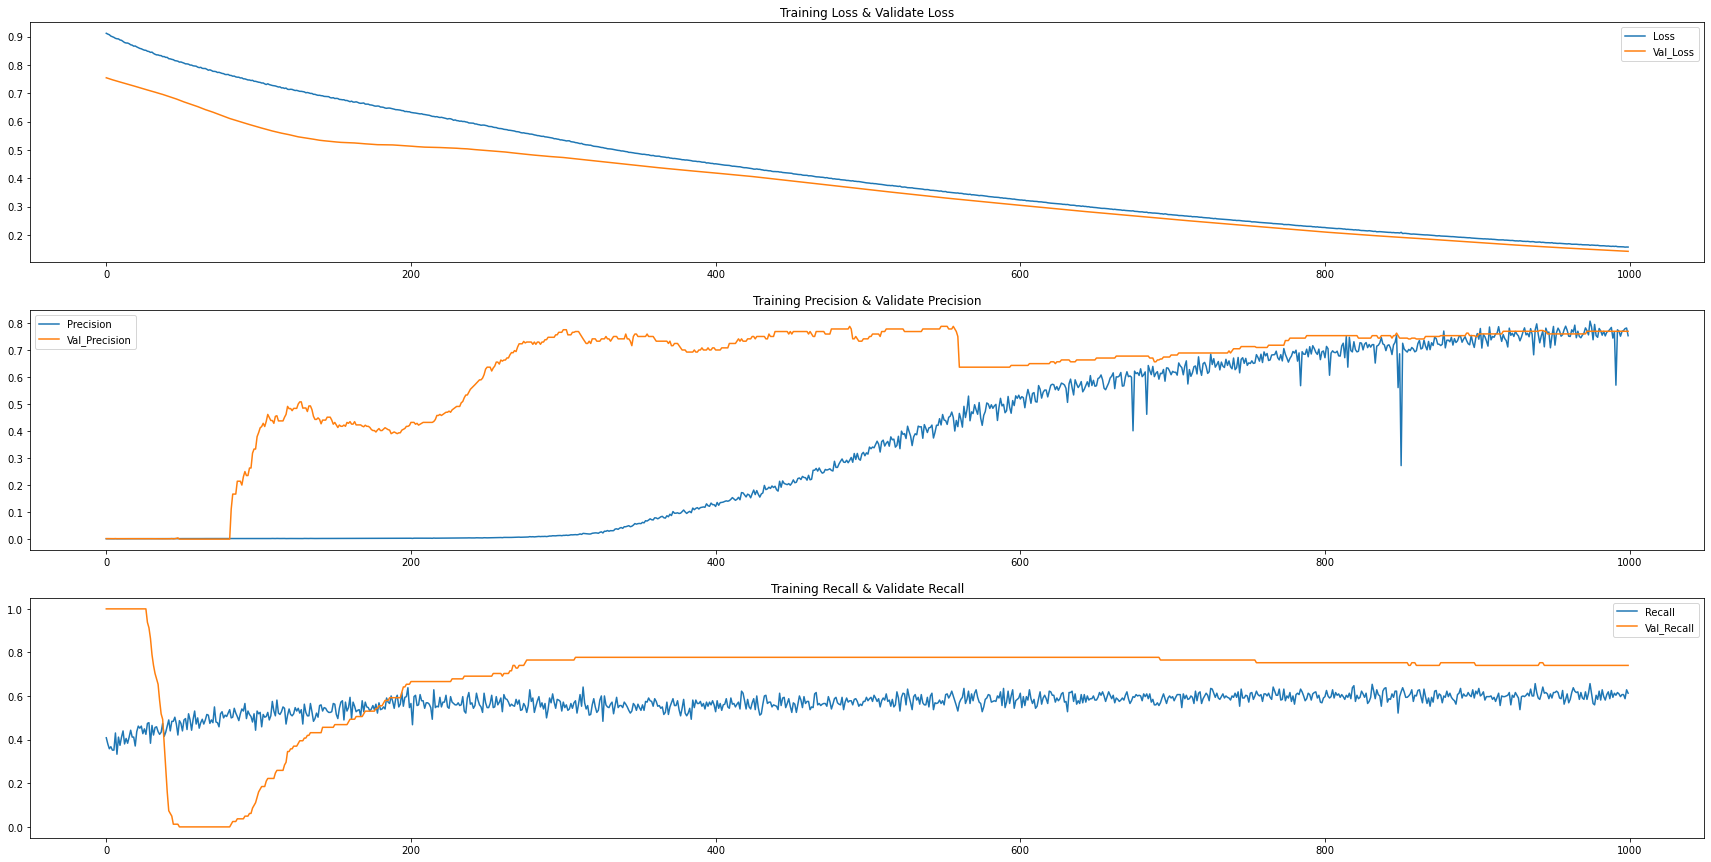

In [70]:
plt.figure(figsize = (30,15))

plt.subplot(3,1,1)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Val_Loss")
plt.title("Training Loss & Validate Loss")
plt.legend()

plt.subplot(3,1,2)
plt.plot(history.history["precision"], label = "Precision")
plt.plot(history.history["val_precision"], label = "Val_Precision")
plt.title("Training Precision & Validate Precision")
plt.legend()

plt.subplot(3,1,3)
plt.plot(history.history["recall"], label = "Recall")
plt.plot(history.history["val_recall"], label = "Val_Recall")
plt.title("Training Recall & Validate Recall")
plt.legend()

# ANN Performance

In [71]:
Ann_predict = tf.cast( model.predict(x_test) > 0.5, dtype = tf.float32)
print("Test Report = \n", classification_report(Ann_predict, y_test))

1781/1781 [==============================] - 1s 593us/step
Test Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56870
         1.0       0.81      0.82      0.81        92

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

